# 📊 Business Intelligence Report

### 🔍 Executive Summary

Okay, let's break down this sales data and pull out some insights.

**1. Data Aggregation & Summary Tables**

Before drawing conclusions, let's first create some aggregated tables to make analysis easier:

*   **Total Units Sold and Revenue by Product:**

    | Product   | Total Units Sold | Total Revenue |
    | --------- | ---------------- | ------------- |
    | Widget A  | 513              | $26,628.36     |
    | Gadget X  | 445              | $24,406.50     |
    | Widget B  | 431              | $24,296.35     |
    | Gadget Y  | 161              | $6,984.04      |

*   **Total Units Sold and Revenue by Region:**

    | Region | Total Units Sold | Total Revenue |
    | ------ | ---------------- | ------------- |
    | East   | 456              | $23,478.24     |
    | North  | 320              | $16,487.45     |
    | South  | 300              | $15,715.47     |
    | West   | 206              | $7,796.11      |

*   **Total Units Sold and Revenue by Month:**

    | Month | Total Units Sold | Total Revenue |
    | ----- | ---------------- | ------------- |
    | Jan   | 140              | $9,683.01     |
    | Feb   | 204              | $13,029.81     |
    | Mar   | 250              | $15,436.13     |
    | Apr   | 280              | $16,398.84     |
    | May   | 218              | $12,742.59     |
    | Jun   | 103              | $8,735.01      |

**2. Insights**

*   **Best-Selling Product(s):** Widget A had the most units sold, with Widget B close behind. However, given how similar the numbers are, it's best to say that Widget A and Widget B are the best-selling products.
*   **Monthly Trends:**  Sales generally increased from January to April, peaking in April, then declining in May and June. This suggests a possible seasonal peak in the Spring (March-April).  June shows a significant drop.
*   **Regional Performance:** The East region consistently outperforms all other regions in both units sold and revenue. West is consistently the lowest performing region.
*   **Anomalies or Dips:**
    *   The significant drop in sales in June is a noticeable dip. Investigate what factors might have caused this (e.g., marketing campaign ending, competitor promotion, supply chain issues).
    *   There's a relatively low number of Gadget Y sales compared to the other products.
*   **Product Performance within Regions:** While the "East" is the top-performing region overall, we can dig deeper:
    *   **East:** All products are performing well, with Widget B contributing a significant amount of revenue.
    *   **North:** Widget A and Widget B are performing the best.
    *   **South:** Widget A is performing well.
    *   **West:** Widget B is performing well.

**3. Business Recommendations**

Based on the analysis, here are some actionable recommendations:

*   **Capitalize on the Spring Peak:**  Plan marketing campaigns and inventory management strategies to maximize sales during the March-April period.  Consider running promotions or introducing new products during this time.
*   **Investigate the June Dip:**  Understand the underlying causes of the sales decline in June.  Possible actions:
    *   Review marketing campaigns from previous months.
    *   Assess competitor activities.
    *   Check for any supply chain disruptions.
    *   Consider re-running successful campaigns in June next year.
*   **Leverage the East Region's Success:**  Analyze why the East region is performing so well.  Is it due to specific marketing efforts, demographics, distribution channels, or other factors?  Try to replicate successful strategies in other regions.
*   **Improve Performance in the West Region:** This region consistently underperforms. Possible strategies:
    *   Increase marketing efforts.
    *   Offer region-specific promotions.
    *   Re-evaluate distribution channels.
    *   Conduct market research to understand local preferences.
*   **Boost Gadget Y Sales:**  Gadget Y lags behind the other products.  Consider the following:
    *   Targeted marketing campaigns highlighting its features.
    *   Bundling it with more popular products (Widget A or Widget B).
    *   Price adjustments.
    *   Gather customer feedback on why sales are low.
*   **Product-Region Optimization:** Tailor product marketing to the strongest product in each region.
*   **Monitor Trends Closely:**  Track sales data on a more granular level (weekly or even daily) to identify emerging trends and potential issues early on.
*   **Customer Segmentation:** Analyze customer demographics and purchase behavior to personalize marketing messages and product offerings.

**Important Considerations:**

*   **Data Scope:** This analysis is based on a limited dataset (one year of data). More comprehensive data over multiple years would provide more robust insights and reveal longer-term trends.
*   **External Factors:** Consider external factors that could influence sales, such as economic conditions, competitor actions, and industry trends.
*   **Pricing:** Include pricing information to understand profitability and potential for revenue optimization. The revenue to unit sold ration for each product and region should be included in the future.
*   **Marketing Spend:** Include marketing spend to see if the regions are performing appropriately based on capital invested.
*   **Product Cost:** Include product cost data to accurately identify profit margins.

By implementing these recommendations and continuously monitoring sales data, the business can improve its overall performance and achieve sustainable growth.

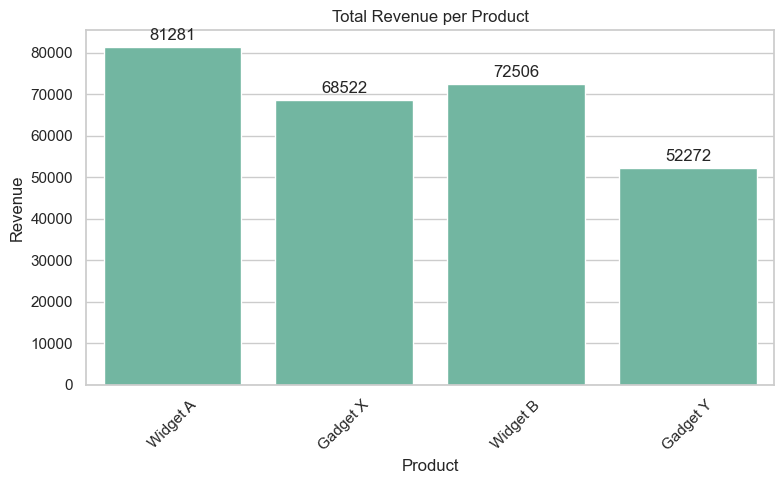

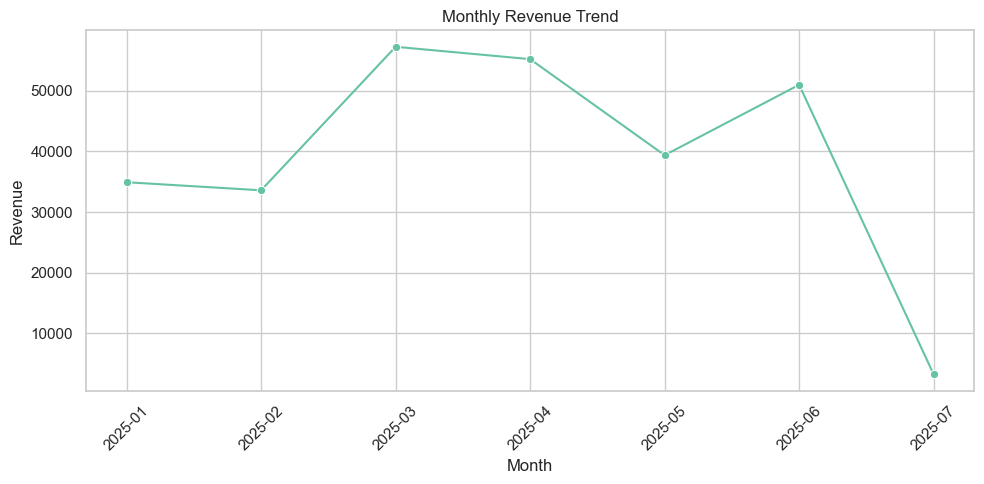

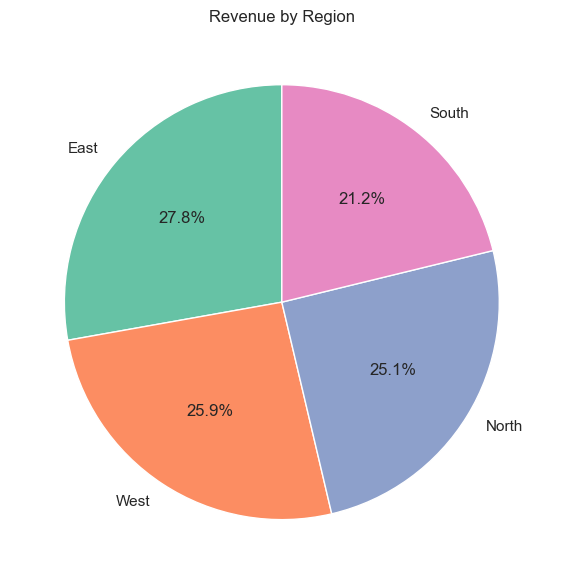

In [5]:
# 04_reporting.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

# Set theme
sns.set_theme(style="whitegrid", palette="Set2")

# Load cleaned dataset
df = pd.read_csv("../data/cleaned_sales.csv")
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.to_period("M")

# --------------------------
# 📄 EXECUTIVE SUMMARY
# --------------------------

INSIGHT_PATH = "../reports/insights.txt"

try:
    with open(INSIGHT_PATH, "r", encoding="utf-8") as f:
        insights = f.read()
except FileNotFoundError:
    insights = "*No insights found. Please generate insights using the Gemini API and save to `insights.txt`.*"

# Display title and insights
display(Markdown("# 📊 Business Intelligence Report"))
display(Markdown(insights))

# --------------------------
# 📈 VISUALIZATIONS
# --------------------------

# 1. Revenue by Product
plt.figure(figsize=(8, 5))
ax1 = sns.barplot(data=df, x="Product", y="Revenue", estimator=sum, errorbar=None)
ax1.bar_label(ax1.containers[0], fmt="%.0f", label_type="edge", padding=3)
plt.title("Total Revenue per Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Revenue Over Time
monthly_revenue = df.groupby("Month")[["Revenue"]].sum().reset_index()
monthly_revenue["Month"] = monthly_revenue["Month"].astype(str)

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_revenue, x="Month", y="Revenue", marker="o")
plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Revenue by Region
region_sales = df.groupby("Region")["Revenue"].sum().sort_values(ascending=False)
region_sales.plot(kind="pie", autopct="%1.1f%%", figsize=(6, 6), startangle=90)
plt.title("Revenue by Region")
plt.ylabel("")
plt.tight_layout()
plt.show()

# --------------------------
# ✅ Export (run from terminal)
# --------------------------

# Use this in your terminal:
# jupyter nbconvert notebooks/04_reporting.ipynb --to html --output reports/business_report.html
